# Regression

This notebook walks through loading and analysing a trained UCM. For large scale experiments, the model analysis code should be put into a Python script to keep the workflow clean and allow parallel processing of many different models.

### Table of contents

1. [**Linear regression**](#linear)
2. [**Bayesian linear regression**](#blinear)
3. [**Nonlinear basis function regression**](#basis)
4. [**Gaussian process regression**](#gp)
5. [**Some notes on non-Gaussian observation**](#notes)

In [3]:
import numpy as np
import scipy as sc

import jax

import matplotlib.pyplot as plt

<a id='linear'></a>
## 1. Linear regression

To model dependencies between two variables, say $x$ and $y$, one of the simplest but most widely used methods is linear regression. As the name suggests, it attempts to capture their relation using a linear function 

$$ f(x) = w \cdot x + b $$

For real world data, noise $\epsilon_i$ is always present and 

$$ y_i = f(x_i) + \epsilon_i $$

for data points $i = 1, 2, \ldots, N$. This setup is common in neuroscience when relating neural activity $y$ to experimental stimuli or behaviour $x$, with the noise accounting for neural variability.

In [46]:
def f_linear(x):
    return 0.2 * x

def f_nonlinear(x):
    return 5. * np.sin(3 * x) + x**2

In [74]:
# generate data
rng = np.random.default_rng(12345)

N = 100

x = 6 * rng.uniform(size=(N,)) - 3

In [75]:
eps = 0.1 * rng.normal(3, size=(N,))
y_linear = f_linear(x) + eps

eps = 1.0 * rng.normal(3, size=(N,))
y_nonlinear = f_nonlinear(x) + eps

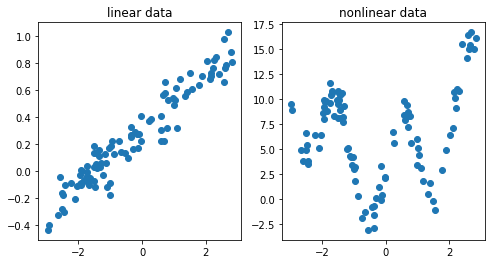

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].set_title('linear data')
axes[0].scatter(x, y_linear)

axes[1].set_title('nonlinear data')
axes[1].scatter(x, y_nonlinear)

plt.show()

To select the parameters $w$ and $b$ that best describe the data, the common criterion is least squares. Here, we require such parameters to minimize the squared errors 

$$ L = \frac{1}{N} \sum_i \| y_i - f(x_i) \|^2 $$


For linear regression, the least squares optimization problem $ \min_{w,b} L $ has a closed form solution 

$$ \min_{w,b} L = \min_{w,b} \frac{1}{N} \sum_i \| y_i - w \cdot x_i - b \|^2 $$

$$ \partial_w L = 0 \Rightarrow \sum_i x_i \, ( y_i - w \cdot x_i - b  ) = 0 $$

$$ \partial_b L = 0 \Rightarrow \sum_i ( y_i - w \cdot x_i - b  ) = 0 $$

Solving these equations, we obtain 

$$ w = \frac{\frac{1}{N} \sum_i x_i y_i - \bar{x} \bar{y}}{\text{Var}(x)} $$

$$ b = $$

For didactic purposes, we derived linear regression from scratch. As linear regression is a widely used tool, standard implementations are readily available in libraries like [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


<a id='blinear'></a>
## 2. Bayesian linear regression

Instead of the least squares perspective above, one can start thinking in terms of how the data was generated. Above, we did not specify the statistical properties of the observation noise $\epsilon$. In a generative modeling approach, we have to be more explicit and state our assumptions about the data generation process. Conventionally, we choose $\epsilon$ to be i.i.d. Gaussian noise 

$$ \epsilon \sim \mathcal{N}(0, \sigma^2) $$

and we 

$$ w, b \sim \mathcal{N}(0, 1) $$


Treating the unknown model parameters as random variables now defines a distribution over all possible models $p\left( f(x) \right)$, and we can visualize samples drawn from this distribution. Each sample is a different possible "explanation" of the data that our generative model can yield.

We thus see that our generative model defines a distribution of what we expect the data to look like, before actually observing any data! This is called the prior distribution ins Bayesian inference, and observing data allows us to apply Bayes' rule 

$$ p(\theta | y) = \frac{p(y | \theta) \, p(\theta)}{p(y)} $$

to obtain our current belief of what the parameters $\theta = (w, b)$ should be. Unlike with least squares, we have an entire distribution over the $\theta$ expressing our uncertainty in estimating each parameter. This is called the posterior distribution.


Applied to the linear regression model, we have 

$$ p(w|y) =  $$

As we observe more data, our posterior becomes more certain. This is intuitive as we obtain more and more information.

The probabilistic aprpoach naturally assigns a number to how well the data $y$ is described, called the marginal likelihood 

$$ p(y) = \int p(y|w,b) \, p(w) \, p(b) \, \mathrm{d}w \, \mathrm{d}b$$

<a id='inspect'></a>
### Relation to least squares


Least squares can be seen as equivalent to maximum likelihood in the probabilistic perspective, where we obtain point estimates of the parameters rather than full posterior distributions.

Note the prior plays the role of a regularizer, and this is referred to as maximum a posteriori (MAP) estimation

<a id='basis'></a>
## 3. Nonlinear basis function regression

So far, our statistical models only account for linear relations between $x$ and $y$. To go beyond linear, we can introduce basis functions to expand the input space. For example, we can introduce a cubic polynomial 

$$ \mathbf{\phi}(x) = [1, x, x^2, x^3] $$

and have the correponding vector of weights $\mathbf{w}$ 

$$ f(x) = \mathbf{w} \cdot \mathbf{\phi}(x) $$

Note that in the vector notation for linear regression, we absorb $w$ and $b$ into a single vector $\mathbf{w}$.

The marginal likelihood here 

<a id='inspect'></a>
### Beyond one-dimensional inputs

The above assumes only one input dimension. Often, one wants to find relations between some observations and multi-dimensional inputs, e.g. 2D animal position $\mathbf{x} = (x_1, x_2)$. A straightforward extension is to concatenate the expansion of the dimensions, i.e. 

$$
\phi(\mathbf{x}) = (1, x_1, x_1^2, x_2, x_2^2 , \ldots)
$$

but this will only yield functions that factorize across input dimensions $f(x_1, x_2) = f_1(x_1) f_2(x_2)$. To obtain more general functions $f(x_1, x_2)$, we need to introduce interactions in our basis expansion set 

$$
\phi(\mathbf{x}) = (1, x_1, x_1^2, x_2, x_2^2 , x_1 x_2 , \ldots)
$$



<a id='gp'></a>
## 4. Gaussian process regression

Instead of specifying the explicit basis expansion, we ...
This is known as the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick) in the machine learning literature. In particular, by specifying the kernel directly we can implicitly work with infinite basis sets 


The squared exponential kernel or radial basis function 

$$ k(x, x') = \sigma^2 e^{-\|x - x'\|^2 / 2} $$

is an example of this 

The added flexibility however does come with a cost. Unlike the above methods based on explicit fixed basis sets, we now have to specify the parameters of the kernel $\theta = (\sigma, l)$. These are called hyperparameters, as they are one level above the parameters $\mathbf{w}$ that are implicit in this formulation. Generally, this optimization 

$$ \min_{\theta} p(\mathbf{y}|\theta) $$

is not solvable in closed form, and one has to use iterative methods such as gradient descent. Luckily in JAX, this is easily done by computing gradients with ```grad```

The marginal likelihood here, comparing all methods...

### MAP estimation

Analogous to the relation between regularized least squares and Bayesian linear regression, the point estimate version here is commonly known as [kernel ridge regression](https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf).

<a id='notes'></a>
## 5. Some notes on non-Gaussian observations

So far, we have ... GLMs, in the machine learning this is termed non-conjugate models as closed form solutions are generally not available. One needsd to rely on iterative algorithms to estimate model parameters.